In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import pickle

import readdy_learn.analyze.analyze as ana
import readdy_learn.analyze.basis as basis
import readdy_learn.analyze.validation as validation
from pathos.multiprocessing import Pool

import pynumtools.kmc as kmc

mpl.rcParams['figure.figsize'] = (16, 13)
import matplotlib.pyplot as plt
import scipy.signal as ss
from readdy_learn.example.regulation_network import RegulationNetwork
from readdy_learn.example.regulation_network import sample_lsq_rates
from readdy_learn.example.regulation_network import sample_along_alpha
from readdy_learn.example.regulation_network import DEFAULT_DESIRED_RATES

/srv/public/clonker/miniconda3/envs/readdy_learn/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_noise_fname(noise):
    return 'case_2_noise_{}.pickle'.format(noise)

In [3]:
def noise_results_exist(noise):
    fname = get_noise_fname(noise)
    return os.path.exists(fname) and os.path.isfile(fname)

In [4]:
def get_noise_results(noise):
    if noise_results_exist(noise):
        with open(get_noise_fname(noise), 'rb') as f:
            return pickle.load(f)
    else:
        raise ValueError("this noise has no associated file {}".format(fname))

In [5]:
def make_positive_scores(results):
    for result in results:
        result['score'] = -result['score']

In [6]:
def plot_results(noise, ax=None):
    r = get_noise_results(noise)
    make_positive_scores(r)
    if ax is None:
        plt.figure(figsize=(15, 10))
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'score')
        plt.xscale('log')
        plt.title('noise = {}'.format(noise))
    else:
        ax.set_xlabel(r'$\alpha$')
        ax.set_ylabel(r'score')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title('noise = {}'.format(noise))
    validation.plot_validation_result(r, ax)
    if ax is None:
        plt.legend()
    else:
        ax.legend()

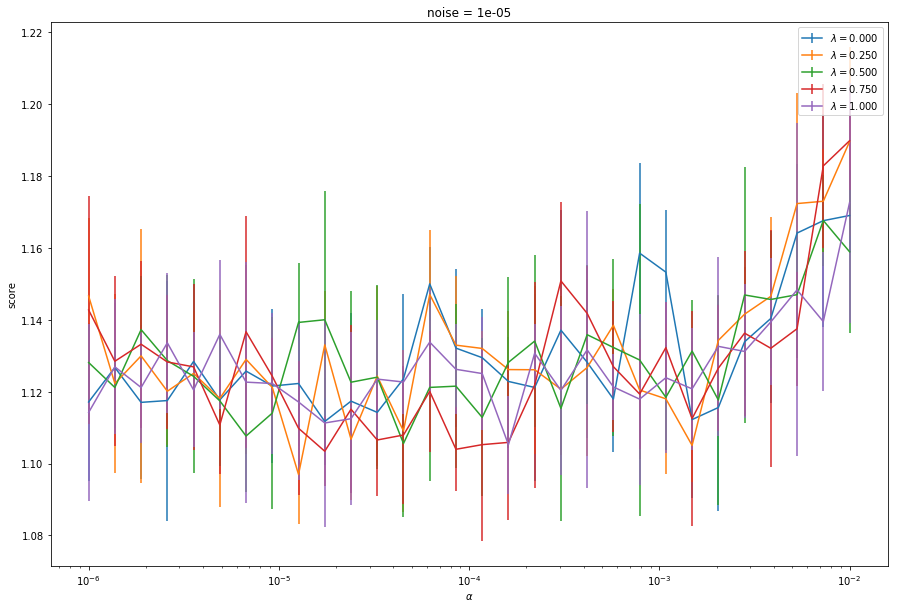

In [9]:
plot_results(1e-5)

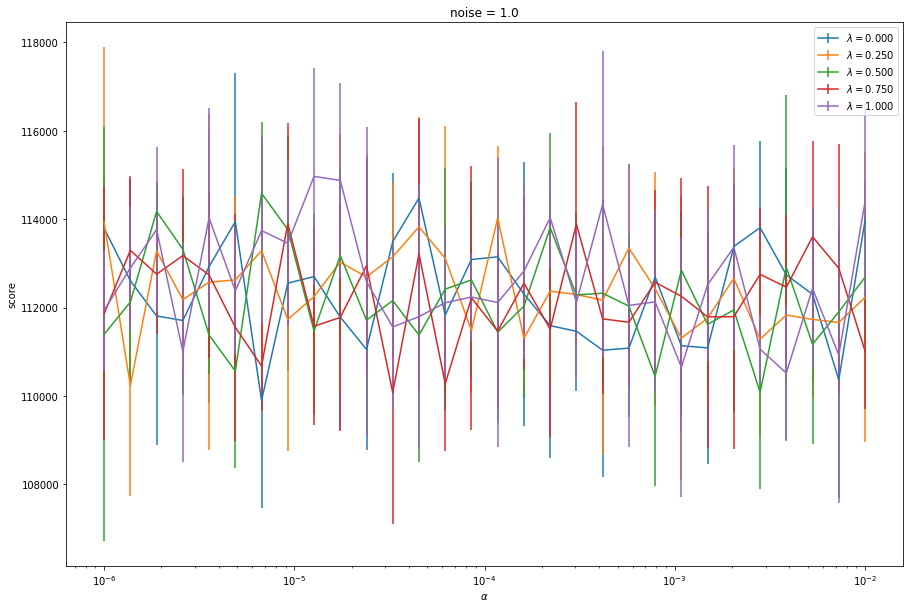

In [17]:
plot_results(1.0)

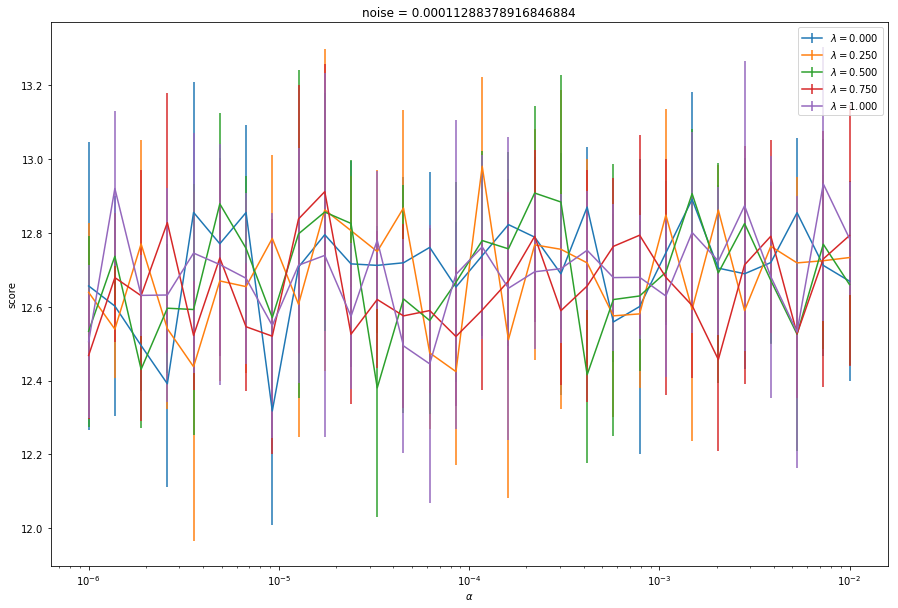

In [10]:
plot_results(0.00011288378916846884)

In [7]:
#larger_noise = np.logspace(-5, 0, 20)
larger_noise = []
noises = np.sort(np.unique(np.append(np.logspace(-10, -5, 20), larger_noise)))
existing_noises = [n for n in noises if noise_results_exist(n)]
n_results = sum(1 for n in existing_noises)

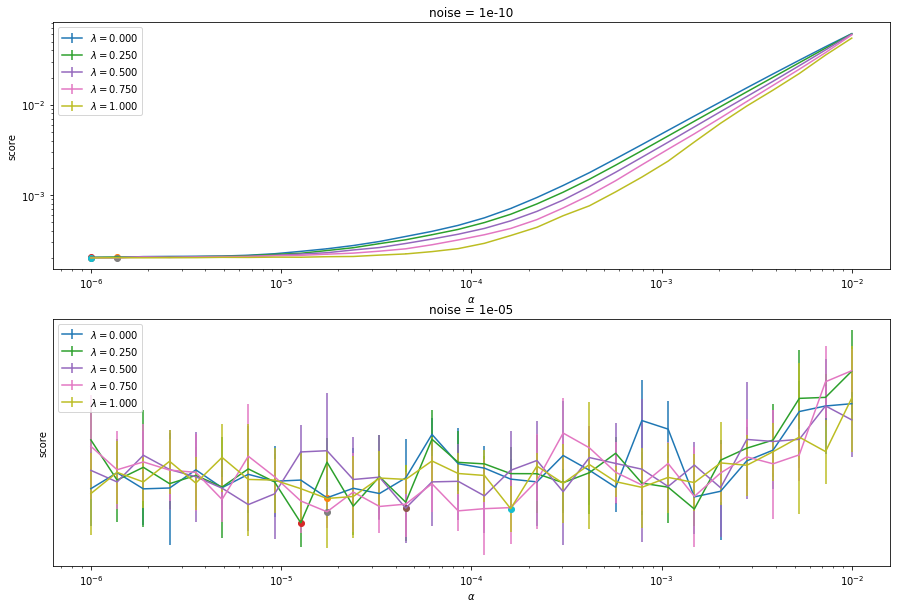

In [8]:
f, axes = plt.subplots(n_results, 1, figsize=(15, 10))
for i, n in enumerate(existing_noises):
    plot_results(n, axes[i])